## Setup


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#!conda activate gnngeometry

In [3]:
import torch
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math, random, torch, collections, time, torch.nn.functional as F, networkx as nx, matplotlib.pyplot as plt, numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from IPython.display import clear_output
from torch_geometric.utils import to_networkx
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from functools import wraps

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

## Generate Spheres

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import torch
from sklearn.neighbors import kneighbors_graph
import scipy as sc
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix, to_undirected

def generate_sphere(r=1, alpha = 1, beta = 1, seed = 1234, n_samples = 3000, n_neighbours = 5, features = 'coordinates', standardize=True):
  random.seed(1234)
  theta = 2 * math.pi * np.random.beta(a = alpha,b = beta, size= n_samples)
  phi =  math.pi * np.random.beta(a = alpha, b = beta, size = n_samples)
  x = r * np.cos(theta) * np.sin(phi)
  y = r * np.sin(theta) * np.sin(phi)
  z = r * np.cos(phi)
  X = np.vstack([np.array(x), np.array(y), np.array(z)]).T
  A = kneighbors_graph(X, n_neighbours, mode='distance', include_self=False)
  edge_index, edge_weights = from_scipy_sparse_matrix(A)
  edge_index, edge_weights = to_undirected(edge_index, edge_weights)
  if standardize:
      preproc = StandardScaler()
      X = preproc.fit_transform(X)
  if features == 'coordinates':
      new_data = Data(x=torch.from_numpy(X).float(),
                      edge_index=edge_index,
                      edge_weight=edge_weights)
  else:
      new_data = Data(x=torch.eye(n_samples), edge_index=edge_index,
                      edge_weight=edge_weights)
  return x,y,z, A, new_data

In [5]:
def generate_helix(alpha = 1, beta = 1, seed = 1234, n_samples = 3000, n_neighbours = 5, features = 'coordinates', standardize=True):
  random.seed(1234)
  theta = 8 * math.pi * np.random.beta(a = alpha,b = beta, size= n_samples)
  phi = 4 * math.pi * np.random.beta(a = alpha, b = beta, size = n_samples)
  n =  np.random.uniform(0,1,n_samples)
  #x=(1.2+0.1*np.cos(phi))*np.cos(theta)
  #y=(1.2+0.1*np.cos(phi))*np.sin(theta)
  theta = np.sort(theta)
  x = n*np.cos(theta)
  y = n*np.sin(theta)
  #z=0.1*np.sin(phi)+theta/np.pi
  z = theta/np.pi 
  X = np.vstack([np.array(x), np.array(y), np.array(z)]).T
  A = kneighbors_graph(X, n_neighbours, mode='distance', include_self=False)
  edge_index, edge_weights = from_scipy_sparse_matrix(A)
  edge_index, edge_weights = to_undirected(edge_index, edge_weights)
  if standardize:
      preproc = StandardScaler()
      X = preproc.fit_transform(X)
  if features == 'coordinates':
      new_data = Data(x=torch.from_numpy(X).float(),
                      edge_index=edge_index,
                      edge_weight=edge_weights)
  else:
      new_data = Data(x=torch.eye(n_samples), edge_index=edge_index,
                      edge_weight=edge_weights)
  return x,y,z, A, new_data

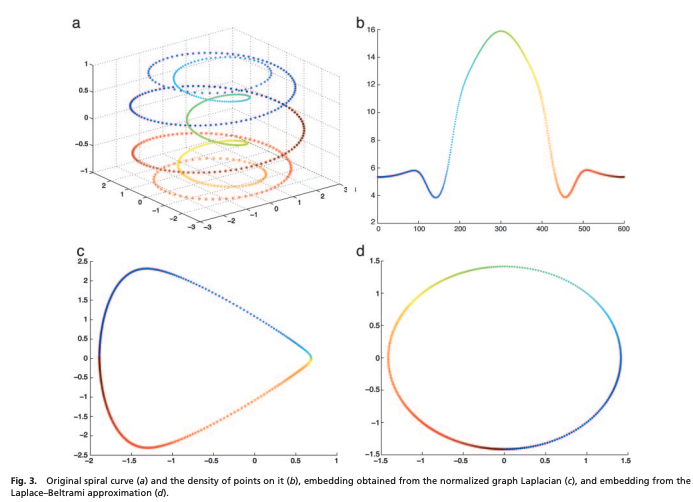

need to generate helix curve rather than spheres?

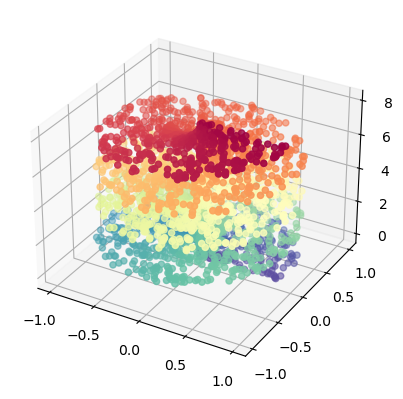

In [6]:
x,y,z,A,new_data = generate_helix(alpha = 1, beta = 1)

fig = plt.figure()
ax = plt.axes(projection ='3d')

# plotting
ax.scatter(x,y,z, cmap = plt.cm.Spectral_r, c = z)
#ax.plot(x,y,z)
plt.show()

<Figure size 640x480 with 0 Axes>

/var/folders/52/dh42902j7rv__r8tnhmqf8_w0000gn/T/ipykernel_41081/1736191027.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx.draw_networkx(nx.from_scipy_sparse_matrix(A),


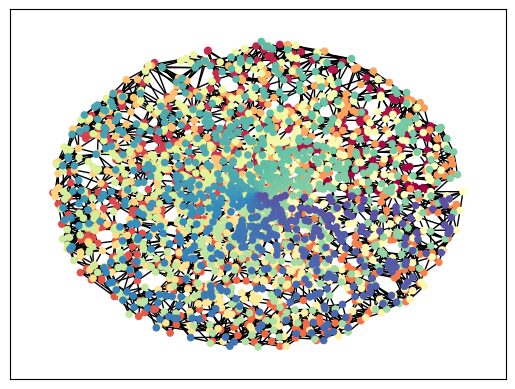

In [7]:
plt.figure()
nx.draw_networkx(nx.from_scipy_sparse_matrix(A),
                 pos={i:[new_data.x[i,0].numpy(),new_data.x[i,1].numpy()] for i in range(new_data.num_nodes)},
                 # to see the "roll" it should by x, y axis
                 node_color=z, cmap='Spectral', with_labels=False, node_size = 20)
plt.show()

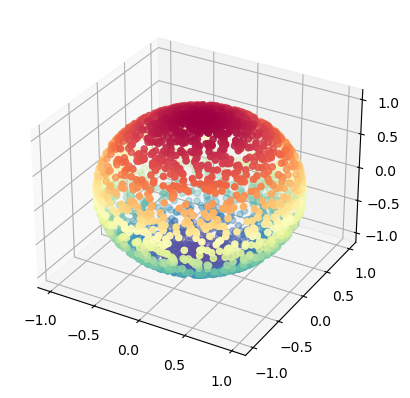

In [8]:
x,y,z,A,new_data = generate_sphere(alpha = 1, beta = 1)

fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x,y,z ,c = z, cmap = plt.cm.Spectral_r)
plt.show()

<Figure size 640x480 with 0 Axes>

/var/folders/52/dh42902j7rv__r8tnhmqf8_w0000gn/T/ipykernel_41081/779525772.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx.draw_networkx(nx.from_scipy_sparse_matrix(A),


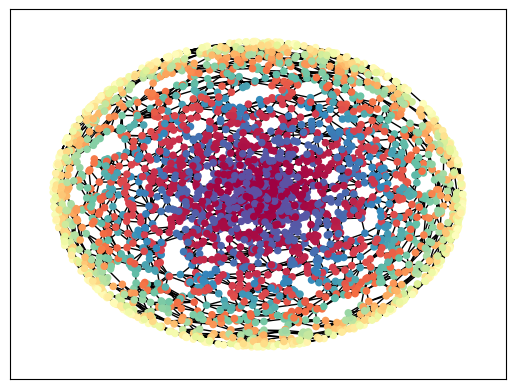

In [9]:
plt.figure()
nx.draw_networkx(nx.from_scipy_sparse_matrix(A),
                 pos={i:[new_data.x[i,0].numpy(),new_data.x[i,1].numpy()] for i in range(new_data.num_nodes)},
                 # to see the "roll" it should by x, y axis
                 node_color=z, cmap='Spectral_r', with_labels=False, node_size = 20)
plt.show()

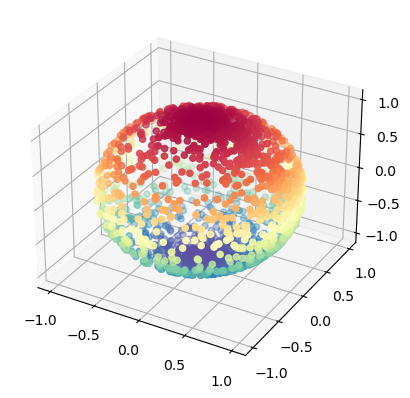

In [10]:
x,y,z,A,new_data = generate_sphere(alpha = 0.5, beta = 0.5)

fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x,y,z ,c = z, cmap = plt.cm.Spectral_r)
plt.show()

<Figure size 640x480 with 0 Axes>

/var/folders/52/dh42902j7rv__r8tnhmqf8_w0000gn/T/ipykernel_41081/779525772.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx.draw_networkx(nx.from_scipy_sparse_matrix(A),


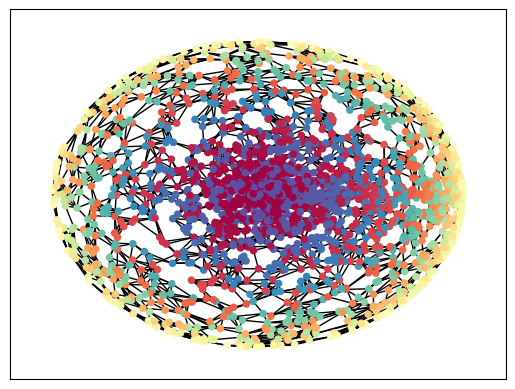

In [11]:
plt.figure()
nx.draw_networkx(nx.from_scipy_sparse_matrix(A),
                 pos={i:[new_data.x[i,0].numpy(),new_data.x[i,1].numpy()] for i in range(new_data.num_nodes)},
                 # to see the "roll" it should by x, y axis
                 node_color=z, cmap='Spectral_r', with_labels=False, node_size = 20)
plt.show()

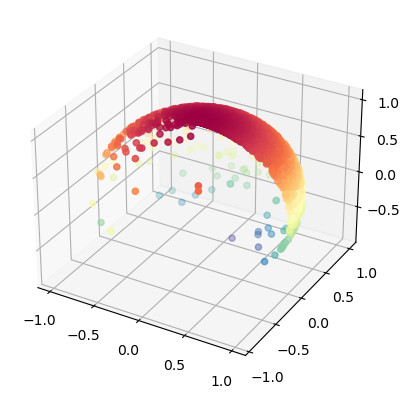

In [12]:
x,y,z,A,new_data = generate_sphere(alpha = 1, beta = 5)

fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x,y,z ,c = z, cmap = plt.cm.Spectral_r)
plt.show()

<Figure size 640x480 with 0 Axes>

/var/folders/52/dh42902j7rv__r8tnhmqf8_w0000gn/T/ipykernel_41081/3349307350.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx.draw_networkx(nx.from_scipy_sparse_matrix(A),


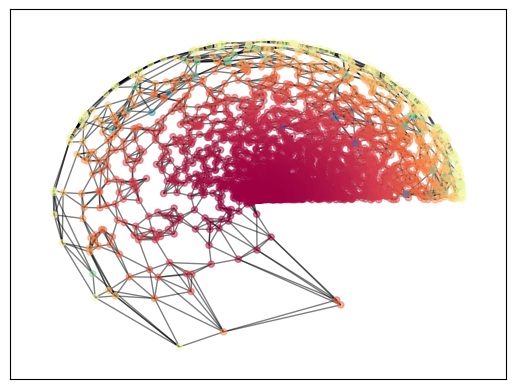

In [13]:
plt.figure()
nx.draw_networkx(nx.from_scipy_sparse_matrix(A),
                 pos={i:[new_data.x[i,0].numpy(),new_data.x[i,1].numpy()] for i in range(new_data.num_nodes)},
                 # to see the "roll" it should by x, y axis
                 node_color=z, cmap='Spectral_r', with_labels=False, node_size = 20, alpha = 0.5)
plt.show()

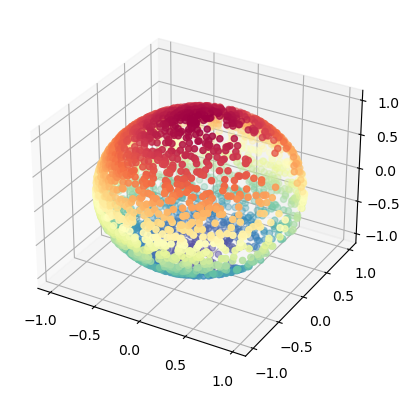

In [14]:
x,y,z,A,new_data = generate_sphere(alpha = 2, beta = 2)

fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x,y,z ,c = z, cmap = plt.cm.Spectral_r)
plt.show()

<Figure size 640x480 with 0 Axes>

/var/folders/52/dh42902j7rv__r8tnhmqf8_w0000gn/T/ipykernel_41081/779525772.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx.draw_networkx(nx.from_scipy_sparse_matrix(A),


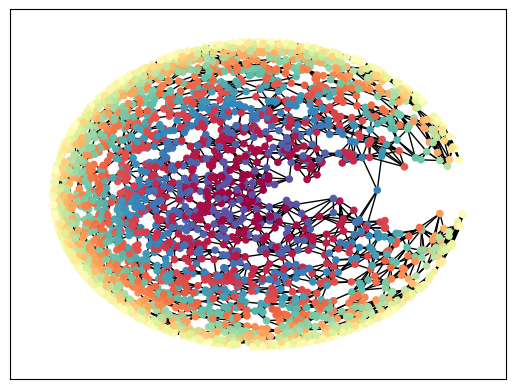

In [15]:
plt.figure()
nx.draw_networkx(nx.from_scipy_sparse_matrix(A),
                 pos={i:[new_data.x[i,0].numpy(),new_data.x[i,1].numpy()] for i in range(new_data.num_nodes)},
                 # to see the "roll" it should by x, y axis
                 node_color=z, cmap='Spectral_r', with_labels=False, node_size = 20)
plt.show()

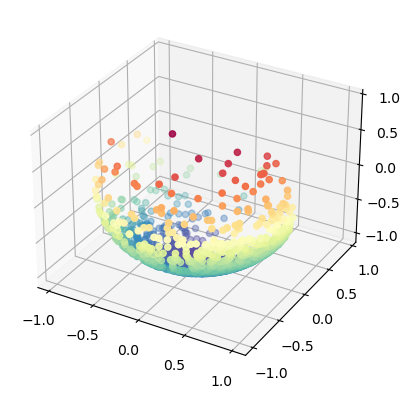

In [16]:
x,y,z,A,new_data = generate_sphere(alpha = 5, beta = 1)

fig = plt.figure()
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x,y,z ,c = z, cmap = plt.cm.Spectral_r)
plt.show()

<Figure size 640x480 with 0 Axes>

/var/folders/52/dh42902j7rv__r8tnhmqf8_w0000gn/T/ipykernel_41081/779525772.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  nx.draw_networkx(nx.from_scipy_sparse_matrix(A),


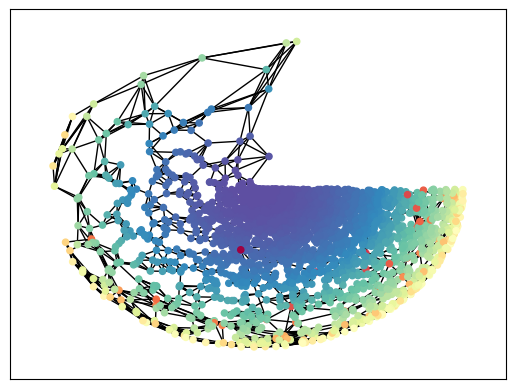

In [17]:
plt.figure()
nx.draw_networkx(nx.from_scipy_sparse_matrix(A),
                 pos={i:[new_data.x[i,0].numpy(),new_data.x[i,1].numpy()] for i in range(new_data.num_nodes)},
                 # to see the "roll" it should by x, y axis
                 node_color=z, cmap='Spectral_r', with_labels=False, node_size = 20)
plt.show()

In [18]:
cd /Users/sowonjeong/Documents/GitHub/GNN-Geometry

/Users/sowonjeong/Documents/GitHub/GNN-Geometry


In [19]:
from models.dgi import *
from models.train_models import train_dgi
from models.baseline_models import *

In [20]:
# cd /Users/sowonjeong/Documents/GitHub/GNN-Geometry/notebook

In [21]:
_,_,c,_,dataset = generate_sphere(alpha = 1, beta = 5)

In [22]:
out = {}
alpha = np.arange(0.0,1.1,0.1)
for i in np.arange(10):
    model = train_dgi(dataset,hid_dim = 32, out_dim = 2, n_layers = 2, patience=50,
              epochs=500, lr=1e-2, name_file="1", device=None, alpha = alpha[i], beta = 1, add_self_loops = True, dropout_rate = 0.01)
    out_tmp = model.get_embedding(dataset)
    out[i] = out_tmp

=== train DGI model ===
Epoch=000, loss=1.0734, time=0.1299


RuntimeError: Parent directory /Users/sowonjeong/Documents/GitHub/GNN-Geometry/results does not exist.

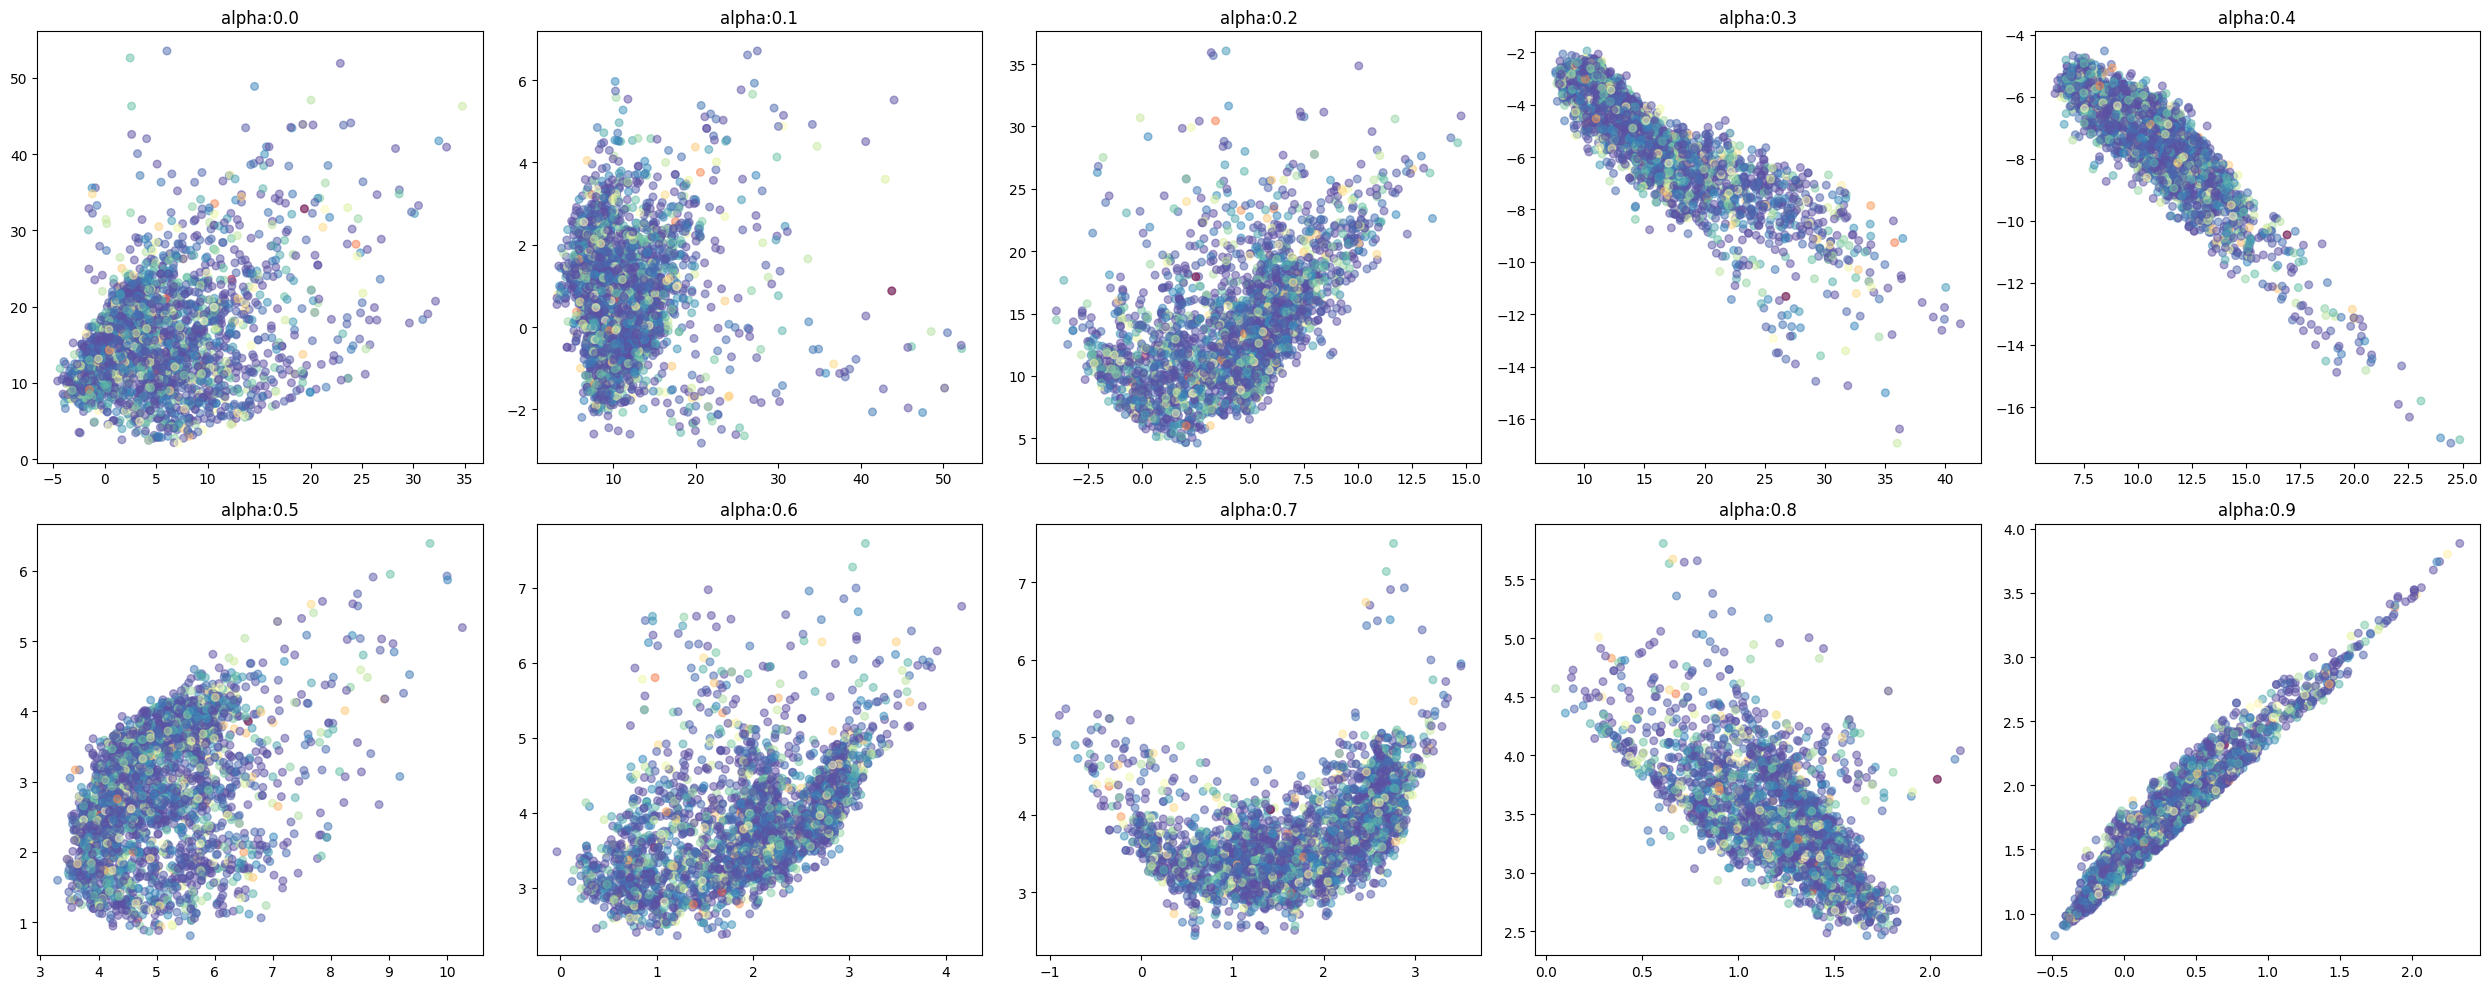

In [ ]:
# dropout = 0.01
num = 10
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(5*num_col,5*num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    _ = ax.scatter(out[i].detach().numpy()[:,0],out[i].detach().numpy()[:,1], c = z, cmap = plt.cm.Spectral_r, s = 30, alpha = 0.5)
    _ = ax.set_title('alpha:' + str(round(alpha[i],1)))
plt.tight_layout()
plt.show()

In [ ]:
from models.grace import *
from models.train_models import train_grace
from models.baseline_models import *

In [ ]:
out = {}
alpha = np.arange(0.0,1.1,0.1)
for i in np.arange(10):
    model = train_grace(dataset, 32, 2, n_layers=1, tau=0.5,
                epochs=500, wd=1e-3, lr=5e-1, fmr=0.2, edr =0.5,
                proj="nonlinear-hid", name_file="test", device=None,
                gnn_type="symmetric", alpha=alpha[i], beta = 1,add_self_loops= True)
    out_tmp = model.get_embedding(dataset)
    out[i] = out_tmp


=== train GRACE model ===
Epoch=000, loss=8.5620
Epoch=001, loss=8.2684
Epoch=002, loss=8.3278
Epoch=003, loss=8.4318
Epoch=004, loss=8.8176
Epoch=005, loss=8.3318
Epoch=006, loss=8.3020
Epoch=007, loss=8.1790
Epoch=008, loss=8.4648
Epoch=009, loss=8.0583
Epoch=010, loss=8.4460
Epoch=011, loss=8.8935
Epoch=012, loss=8.5080
Epoch=013, loss=8.0668
Epoch=014, loss=8.0685
Epoch=015, loss=8.4850
Epoch=016, loss=8.1225
Epoch=017, loss=9.4078
Epoch=018, loss=8.0848
Epoch=019, loss=8.1012
Epoch=020, loss=8.3298
Epoch=021, loss=8.0852
Epoch=022, loss=8.8768
Epoch=023, loss=8.2695
Epoch=024, loss=8.2098
Epoch=025, loss=7.9681
Epoch=026, loss=8.1167
Epoch=027, loss=8.3722
Epoch=028, loss=7.8615
Epoch=029, loss=8.3895
Epoch=030, loss=8.2188
Epoch=031, loss=8.3640
Epoch=032, loss=8.3416
Epoch=033, loss=7.9509
Epoch=034, loss=8.1505
Epoch=035, loss=7.9193
Epoch=036, loss=7.9071
Epoch=037, loss=8.0920
Epoch=038, loss=8.7161
Epoch=039, loss=7.8795
Epoch=040, loss=8.1471
Epoch=041, loss=8.0364
Epoch=04

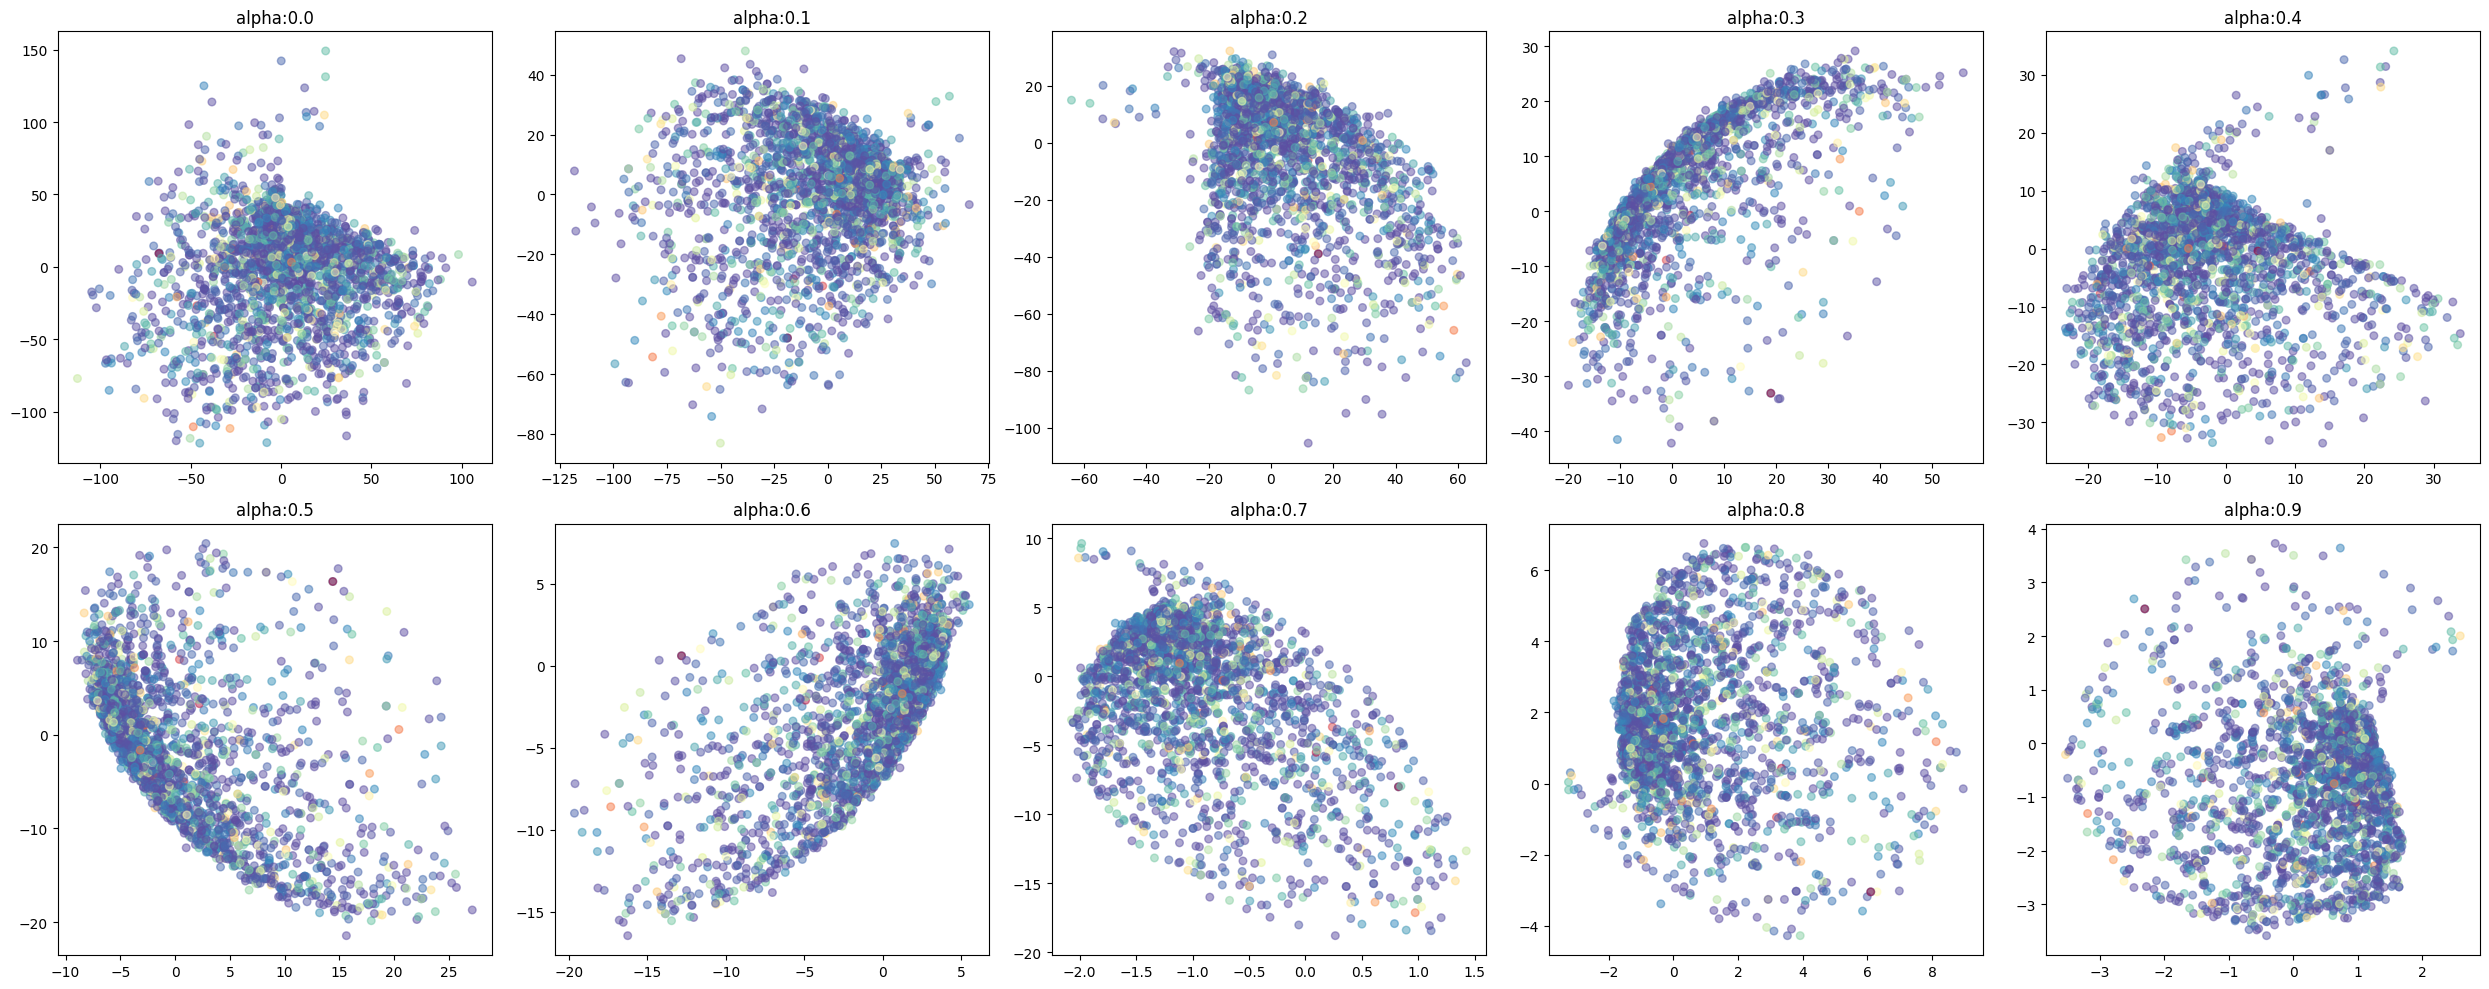

In [ ]:
num = 10
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(5*num_col,5*num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    _ = ax.scatter(out[i].detach().numpy()[:,0],out[i].detach().numpy()[:,1], c = z, cmap = plt.cm.Spectral_r, s = 30, alpha = 0.5)
    _ = ax.set_title('alpha:' + str(round(alpha[i],1)))
plt.tight_layout()
plt.show()